# **Final-Project**
---
##**Submited by:-**
* **Ashish Pandya(000543403)**
* **Dhruvil Patel(000544320)**

In [1]:
# import matlab and numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset into a DataFrame
file_path = '/content/COVID_Parcel_Business.csv'
data = pd.read_csv(file_path)

In [3]:
data.head(12)

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
5,718117,2018,2,18
6,718117,2020,8,232
7,718117,2020,10,229
8,718117,2020,2,251
9,718117,2019,5,93


In [4]:
data.shape

(190719, 4)

In [5]:
data['FakeCustomerID'].unique()

array([718117, 317344, 631279, ..., 994361, 811549, 228893])

In [6]:
data['THE_YEAR'].unique()

array([2021, 2020, 2019, 2018])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [8]:
missing_value = data.isnull().sum()
missing_value

,0
FakeCustomerID,0
THE_YEAR,0
THE_WEEK,0
VOLUME,0


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(190719, 4)

## **Total Volume per year**

   THE_YEAR    VOLUME
0      2018  49099478
1      2019  52823114
2      2020  73475690
3      2021  48679668


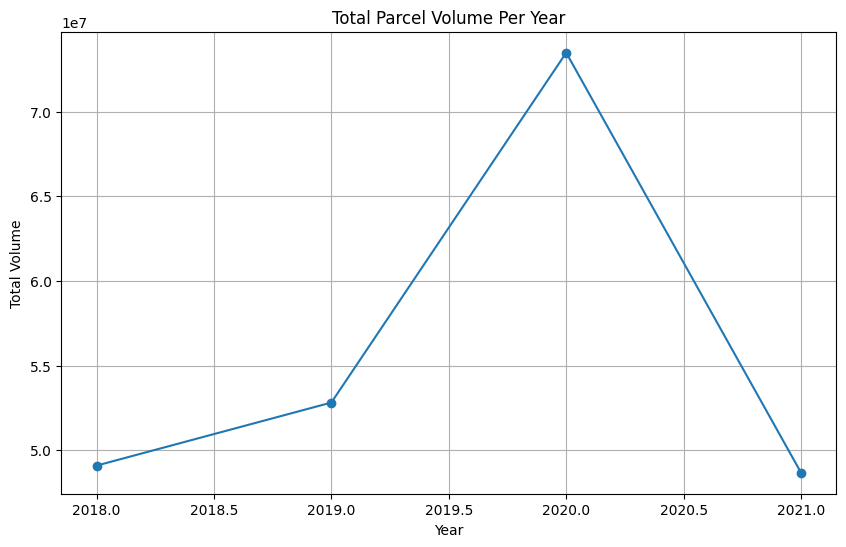

In [11]:
# Total volume per year
volume_per_year = data.groupby('THE_YEAR')['VOLUME'].sum().reset_index()
print(volume_per_year)

# Line chart to visualize trends
plt.figure(figsize=(10, 6))
plt.plot(volume_per_year['THE_YEAR'], volume_per_year['VOLUME'], marker='o')
plt.title('Total Parcel Volume Per Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid()
# Save the plot
plt.savefig('Total_Parcel_Volume_Per_Year.png', bbox_inches='tight')
plt.show()

# **Weekly Parcel Volume Comparison (2019-2021)**
###**1.When were customer volumes first impacted by COVID-19?**
###**2.What events within the COVID timeline may have contributed to the change?**

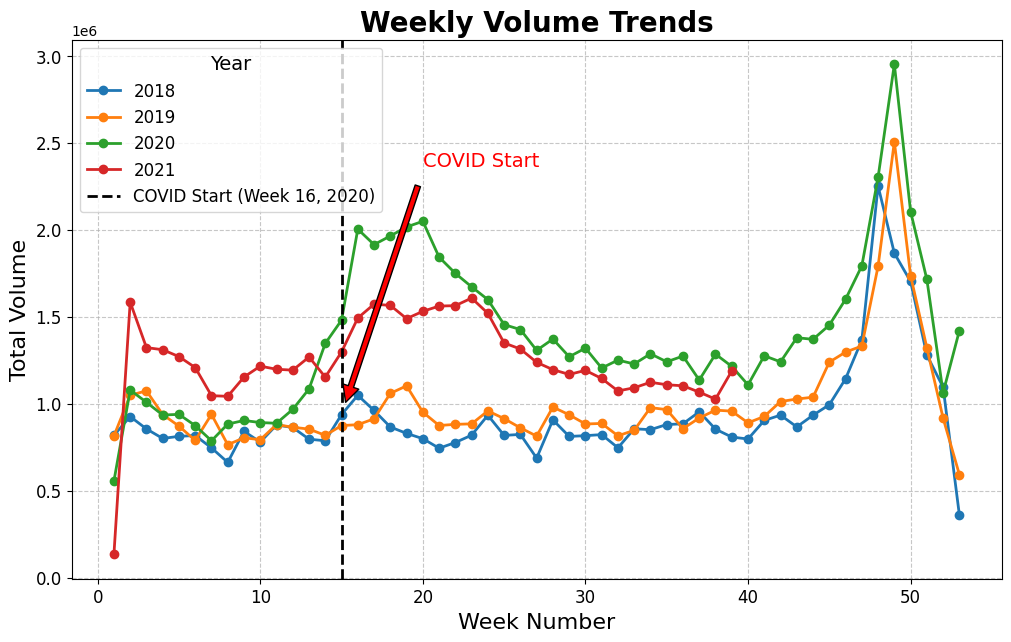

In [12]:
# Weekly Trends
volume_trends = data.groupby(['THE_YEAR', 'THE_WEEK'])['VOLUME'].sum().reset_index()

plt.figure(figsize=(12, 7))  # Increase figure size for better visibility

# Plot volumes for each year separately
for year in volume_trends['THE_YEAR'].unique():
    yearly_data = volume_trends[volume_trends['THE_YEAR'] == year]
    plt.plot(yearly_data['THE_WEEK'], yearly_data['VOLUME'], marker='o', linestyle='-', linewidth=2, markersize=6, label=f'{year}')

# Add vertical line for COVID start
plt.axvline(x=15, color='black', linestyle='--', linewidth=2, label='COVID Start (Week 16, 2020)')

# Customize the plot
plt.title('Weekly Volume Trends', fontsize=20, fontweight='bold')
plt.xlabel('Week Number', fontsize=16)
plt.ylabel('Total Volume', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate COVID start point
plt.annotate('COVID Start', xy=(15, volume_trends[volume_trends['THE_WEEK'] == 15]['VOLUME'].values[0]),
             xytext=(20, volume_trends['VOLUME'].max() * 0.8),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=14, color='red')

# Save the plot
plt.savefig('Weekly_Volume_Trends.png', bbox_inches='tight')

plt.show()

##**How did the COVID-19 pandemic impact ABC Company’s parcel business?**
### **How did COVID-19 impact peak season in 2020?**

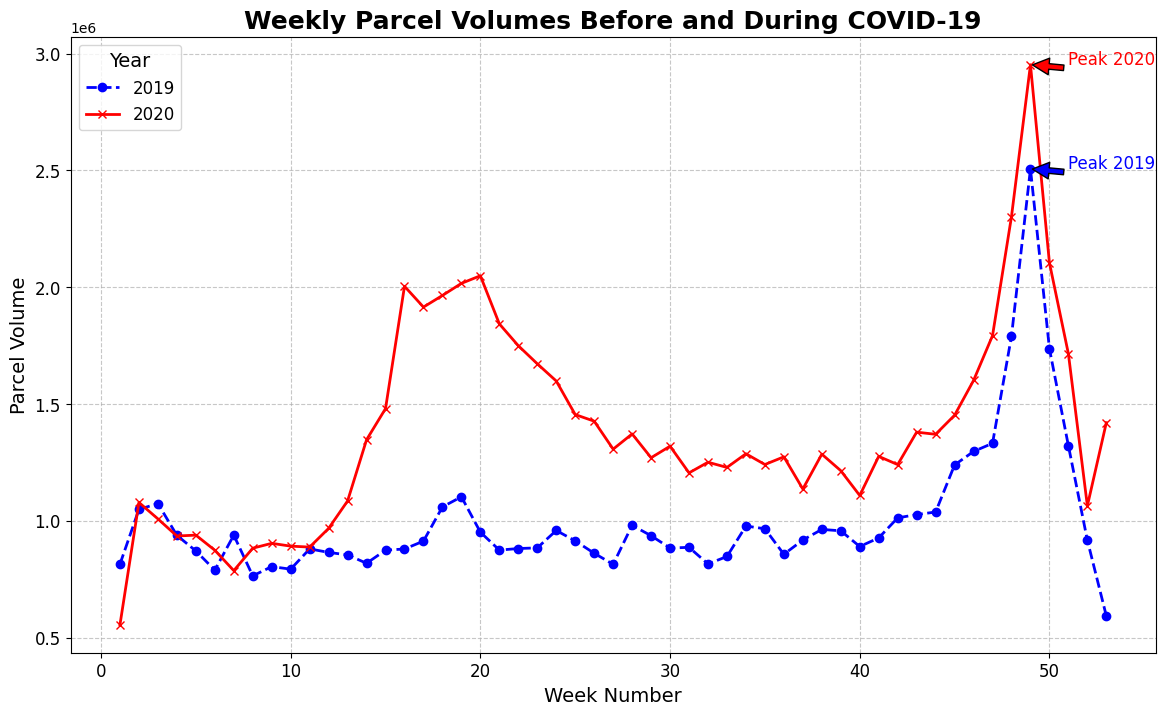

In [13]:
# Compute yearly parcel volumes before and during COVID-19
pre_covid = data[data['THE_YEAR'] == 2019]
during_covid = data[data['THE_YEAR'] == 2020]

weekly_pre_covid = pre_covid.groupby('THE_WEEK').sum()
weekly_during_covid = during_covid.groupby('THE_WEEK').sum()

# Plot the volumes
plt.figure(figsize=(14, 8))
plt.plot(weekly_pre_covid.index, weekly_pre_covid['VOLUME'], label='2019', color='blue', marker='o', linestyle='--', linewidth=2)
plt.plot(weekly_during_covid.index, weekly_during_covid['VOLUME'], label='2020', color='red', marker='x', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Weekly Parcel Volumes Before and During COVID-19', fontsize=18, fontweight='bold')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Parcel Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate significant points
max_pre_covid = weekly_pre_covid['VOLUME'].max()
max_during_covid = weekly_during_covid['VOLUME'].max()
plt.annotate('Peak 2019', xy=(weekly_pre_covid['VOLUME'].idxmax(), max_pre_covid), xytext=(weekly_pre_covid['VOLUME'].idxmax()+2, max_pre_covid+2000),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
plt.annotate('Peak 2020', xy=(weekly_during_covid['VOLUME'].idxmax(), max_during_covid), xytext=(weekly_during_covid['VOLUME'].idxmax()+2, max_during_covid+2000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

# Save the plot
plt.savefig('Weekly_Parcel_Volumes_Before_and_During_COVID-19.png', bbox_inches='tight')
plt.show()


In [14]:
# Detect significant changes in weekly volumes
volume_change = weekly_during_covid['VOLUME'].pct_change()
significant_change = volume_change[volume_change.abs() > 0.1]  # Define a threshold for significant change
print(significant_change)

THE_WEEK
2     0.943265
8     0.122049
13    0.121344
14    0.241488
16    0.353829
21   -0.100594
37   -0.108158
38    0.131244
41    0.151064
43    0.111986
46    0.102511
47    0.119903
48    0.284395
49    0.282333
50   -0.287217
51   -0.185115
52   -0.379688
53    0.334871
Name: VOLUME, dtype: float64


In [15]:
# Define Pre-COVID and COVID Periods with week
pre_covid = data[(data['THE_YEAR'] == 2019) & (data['THE_WEEK'] <= 15)]
covid_period = data[(data['THE_YEAR'] == 2020) & (data['THE_WEEK'] >= 16)]

In [16]:
# Calculate Industry Standard Growth Rate (ISGR)
pre_covid_2020 = data[(data['THE_YEAR'] == 2020) & (data['THE_WEEK'] <= 15)]
pre_covid_2019 = data[(data['THE_YEAR'] == 2019) & (data['THE_WEEK'] <= 15)]

pre_covid_2020_volume = pre_covid_2020['VOLUME'].sum()
pre_covid_2019_volume = pre_covid_2019['VOLUME'].sum()

ISGR = ((pre_covid_2020_volume - pre_covid_2019_volume) / pre_covid_2019_volume) * 100
print(f"Industry Standard Growth Rate (ISGR): {ISGR:.2f}%")

Industry Standard Growth Rate (ISGR): 11.40%


In [17]:
# Aggregate Data by Customer
pre_covid_agg = pre_covid.groupby(['FakeCustomerID']).agg(
    Pre_COVID_Volume=('VOLUME', 'sum')
).reset_index()

covid_period_agg = covid_period.groupby(['FakeCustomerID']).agg(
    COVID_Volume=('VOLUME', 'sum')
).reset_index()

# Merge Pre-COVID and COVID Data
customer_data = pd.merge(pre_covid_agg, covid_period_agg, on='FakeCustomerID', how='outer').fillna(0)

In [18]:
customer_data.head()

,FakeCustomerID,Pre_COVID_Volume,COVID_Volume
0,100771,442.0,1341.0
1,102180,1365.0,3989.0
2,102643,745.0,1104.0
3,102750,344.0,209.0
4,103308,19560.0,79952.0


In [19]:
# Calculate Growth Rates and Categorize Customers
customer_data['Volume_Growth_Rate'] = (
    (customer_data['COVID_Volume'] - customer_data['Pre_COVID_Volume']) / customer_data['Pre_COVID_Volume'].replace(0, np.nan)
) * 100

def categorize(row):
    if row['Pre_COVID_Volume'] == 0 and row['COVID_Volume'] > 0:
        return 'New Customer'
    elif row['Volume_Growth_Rate'] > ISGR:
        return 'High Growth'
    elif row['Volume_Growth_Rate'] == ISGR:
        return 'Stable'
    elif row['Volume_Growth_Rate'] < 0:
        return 'Declining'
    elif row['Pre_COVID_Volume'] > 0 and row['COVID_Volume'] == 0:
        return 'Lost'
    else:
        return 'Moderately Growing'

customer_data['Customer_Category'] = customer_data.apply(categorize, axis=1)

In [20]:
# Add a 'Capped_Growth' column to limit Volume_Growth_Rate to a maximum of 100%
customer_data['Capped_Growth'] = customer_data['Volume_Growth_Rate'].apply(lambda x: min(x, 100) if x > 0 else x)
customer_data['Volume_Growth_Rate'] = (
    (customer_data['COVID_Volume'] - customer_data['Pre_COVID_Volume']) / customer_data['Pre_COVID_Volume'].replace(0, np.nan)
) * 100
# Cap growth for understanding purposes
customer_data['Capped_Growth'] = customer_data['Volume_Growth_Rate'].apply(lambda x: min(x, 100) if x > 0 else x)

In [21]:
customer_data.head()

,FakeCustomerID,Pre_COVID_Volume,COVID_Volume,Volume_Growth_Rate,Customer_Category,Capped_Growth
0,100771,442.0,1341.0,203.393665,High Growth,100.000000
1,102180,1365.0,3989.0,192.234432,High Growth,100.000000
2,102643,745.0,1104.0,48.187919,High Growth,48.187919
3,102750,344.0,209.0,-39.244186,Declining,-39.244186
4,103308,19560.0,79952.0,308.752556,High Growth,100.000000


In [22]:
# Peak Season Analysis
peak_season_2020 = data[(data['THE_YEAR'] == 2020) & (data['THE_WEEK'].between(40, 52))]
peak_season_2019 = data[(data['THE_YEAR'] == 2019) & (data['THE_WEEK'].between(40, 52))]

peak_2020_volume = peak_season_2020['VOLUME'].sum()
peak_2019_volume = peak_season_2019['VOLUME'].sum()
print(f"Peak Season 2019 Volume: {peak_2019_volume}")
print(f"Peak Season 2020 Volume: {peak_2020_volume}")

Peak Season 2019 Volume: 17031369
Peak Season 2020 Volume: 21356413


In [23]:
#Volume Tier Analysis
customer_data['Volume_Tier'] = pd.cut(
    customer_data['COVID_Volume'],
    bins=[-1, 100, 500, np.inf],
    labels=['Low Volume', 'Medium Volume', 'High Volume']
)

volume_tier_impact = customer_data.groupby('Volume_Tier').agg(
    Pre_COVID_Volume=('Pre_COVID_Volume', 'sum'),
    COVID_Volume=('COVID_Volume', 'sum'),
    Customer_Count=('FakeCustomerID', 'count')
).reset_index()

<ipython-input-23-47976a92a19d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_tier_impact = customer_data.groupby('Volume_Tier').agg(


In [24]:
# Define customer groups based on volume thresholds and discounts
def assign_customer_size(volume):
    if volume > 500000:
        return 'Enterprise'
    elif 200000 <= volume <= 500000:
        return 'Large'
    elif 10000 <= volume < 200000:
        return 'Medium'
    elif 1000 <= volume < 10000:
        return 'Small'
    else:
        return 'Other'

customer_data['Customer_Size'] = customer_data['COVID_Volume'].apply(assign_customer_size)

# Calculate discount impact
discounts = {'Enterprise': 22, 'Large': 17, 'Medium': 10, 'Small': 4, 'Other': 0}
customer_data['Discount'] = customer_data['Customer_Size'].map(discounts)

# Group data by customer size
grouped_discounts = customer_data.groupby('Customer_Size').agg(
    Total_Volume=('COVID_Volume', 'sum'),
    Average_Discount=('Discount', 'mean'),
    Customer_Count=('FakeCustomerID', 'count')
).reset_index()

## **What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?**

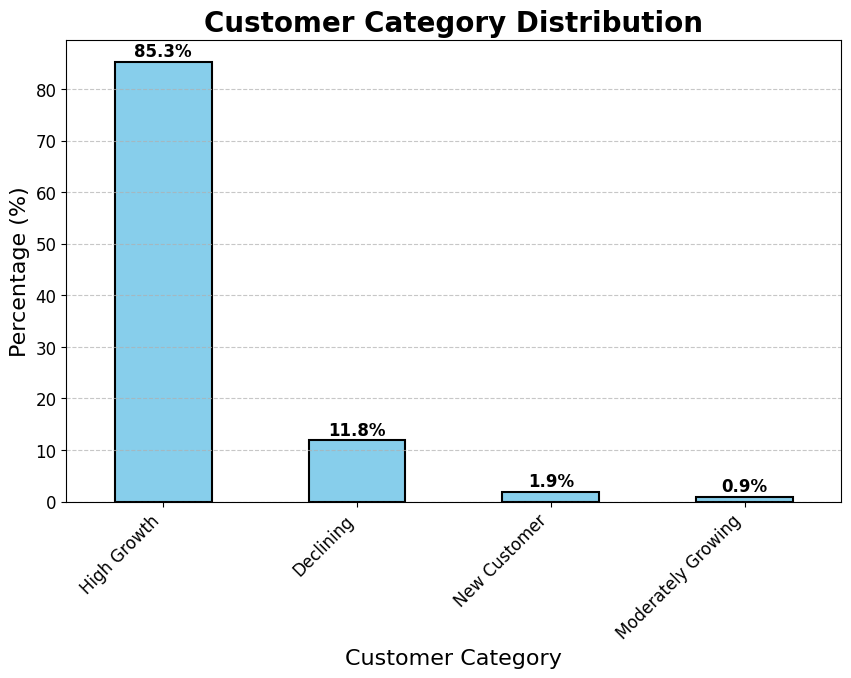

In [25]:
# Customer Category Distribution
customer_category_distribution = customer_data['Customer_Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
customer_category_distribution.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.5)

# Customize the plot
plt.title('Customer Category Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Customer Category', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with percentage values
for index, value in enumerate(customer_category_distribution):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Save the plot
plt.savefig('Customer_Category_Distribution.png', bbox_inches='tight')

plt.show()


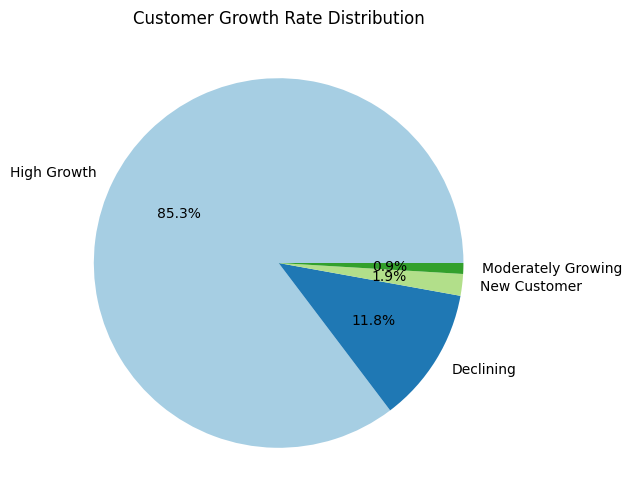

In [26]:
# Pie Chart: Growth Rate Distribution
plt.figure(figsize=(8, 6))
customer_data['Customer_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Customer Growth Rate Distribution')
plt.ylabel('')
plt.savefig('Growth_Rate_Distribution_Pie.png')
plt.show()

##**How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?**

<Figure size 1200x800 with 0 Axes>

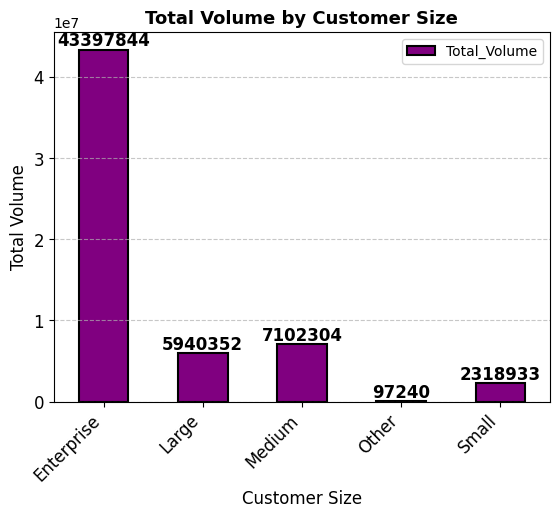

In [27]:
# Customer Size Analysis
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Plot the bar graph
grouped_discounts.plot(kind='bar', x='Customer_Size', y='Total_Volume', color='purple', edgecolor='black', linewidth=1.5)

# Customize the plot
plt.title('Total Volume by Customer Size', fontsize=13, fontweight='bold')
plt.xlabel('Customer Size', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with volume values
for index, value in enumerate(grouped_discounts['Total_Volume']):
    plt.text(index, value + max(grouped_discounts['Total_Volume']) * 0.01, f'{value:.0f}', ha='center', fontsize=12, fontweight='bold')

# Save the plot
plt.savefig('Customer_Size_Volume.png', bbox_inches='tight')

plt.show()


## **What was the overall impact of COVID on volumes and revenue by customer group**

In [28]:
# Overall Impact of COVID on Volumes and Revenue by Customer Group
overall_impact = customer_data.groupby('Customer_Category').agg(
    Total_Pre_COVID_Volume=('Pre_COVID_Volume', 'sum'),
    Total_COVID_Volume=('COVID_Volume', 'sum'),
    Average_Growth_Rate=('Volume_Growth_Rate', 'mean'),
    Customer_Count=('FakeCustomerID', 'count')
).reset_index()

# Add Total Revenue Impact Placeholder (Assuming 'Revenue' Calculation Exists)
# Example Revenue Logic: Replace 'Revenue_Per_Unit' with actual column/constant
Revenue_Per_Unit = 1.2  # Example: $1.2 revenue per unit volume
overall_impact['Pre_COVID_Revenue'] = overall_impact['Total_Pre_COVID_Volume'] * Revenue_Per_Unit
overall_impact['COVID_Revenue'] = overall_impact['Total_COVID_Volume'] * Revenue_Per_Unit
overall_impact['Revenue_Change'] = overall_impact['COVID_Revenue'] - overall_impact['Pre_COVID_Revenue']

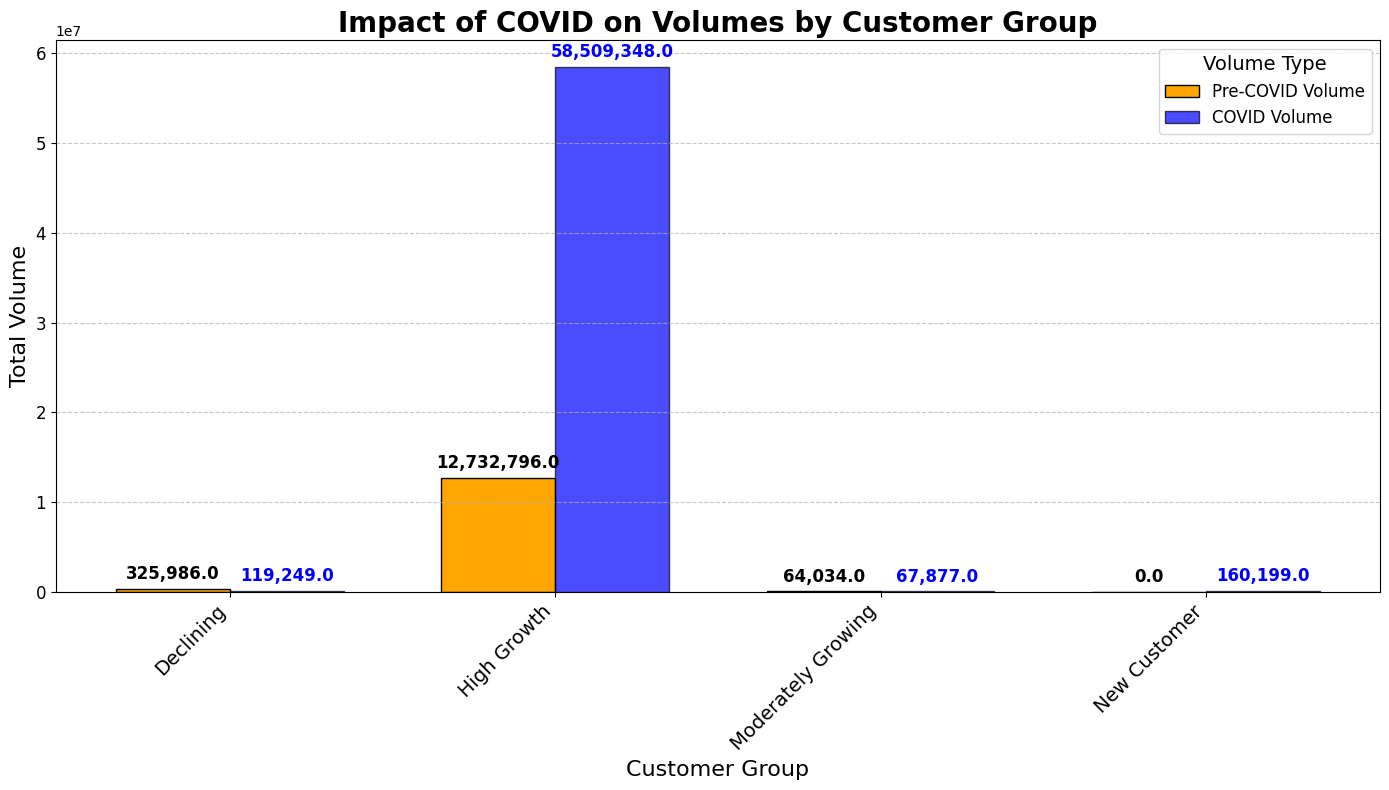

In [29]:
# Visualization: COVID Impact on Volumes and Revenue
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility

bar_width = 0.35
index = np.arange(len(overall_impact['Customer_Category']))

# Plot side-by-side bars
plt.bar(index, overall_impact['Total_Pre_COVID_Volume'], bar_width, color='orange', label='Pre-COVID Volume', edgecolor='black')
plt.bar(index + bar_width, overall_impact['Total_COVID_Volume'], bar_width, color='blue', label='COVID Volume', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Impact of COVID on Volumes by Customer Group', fontsize=20, fontweight='bold')
plt.xlabel('Customer Group', fontsize=16)
plt.ylabel('Total Volume', fontsize=16)
plt.xticks(index + bar_width / 2, overall_impact['Customer_Category'], fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Volume Type', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with volume values
for i in range(len(overall_impact)):
    plt.text(index[i], overall_impact['Total_Pre_COVID_Volume'][i] + 0.05 * max(overall_impact['Total_Pre_COVID_Volume']), f'{overall_impact["Total_Pre_COVID_Volume"][i]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.text(index[i] + bar_width, overall_impact['Total_COVID_Volume'][i] + 0.05 * max(overall_impact['Total_Pre_COVID_Volume']), f'{overall_impact["Total_COVID_Volume"][i]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.tight_layout()

# Save the plot
plt.savefig('COVID_Impact_Volumes.png', bbox_inches='tight')

plt.show()


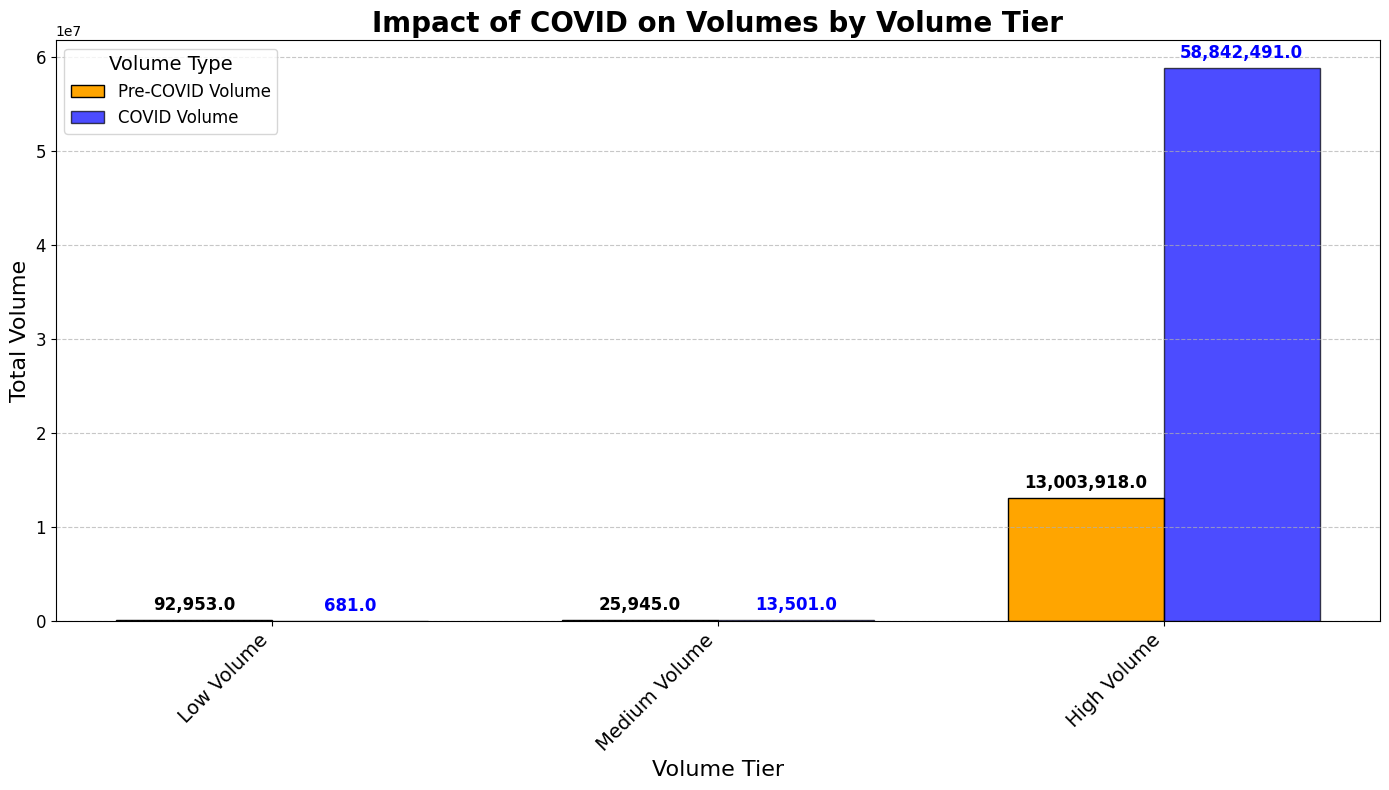

In [30]:
# Visualization: Volume Tier Impact
plt.figure(figsize=(14, 8))  # Increase figure size for better visibility

bar_width = 0.35
index = np.arange(len(volume_tier_impact['Volume_Tier']))

# Plot side-by-side bars
plt.bar(index, volume_tier_impact['Pre_COVID_Volume'], bar_width, color='orange', label='Pre-COVID Volume', edgecolor='black')
plt.bar(index + bar_width, volume_tier_impact['COVID_Volume'], bar_width, color='blue', label='COVID Volume', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Impact of COVID on Volumes by Volume Tier', fontsize=20, fontweight='bold')
plt.xlabel('Volume Tier', fontsize=16)
plt.ylabel('Total Volume', fontsize=16)
plt.xticks(index + bar_width / 2, volume_tier_impact['Volume_Tier'], fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Volume Type', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with volume values
for i in range(len(volume_tier_impact)):
    plt.text(index[i], volume_tier_impact['Pre_COVID_Volume'][i] + 0.05 * max(volume_tier_impact['Pre_COVID_Volume']), f'{volume_tier_impact["Pre_COVID_Volume"][i]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.text(index[i] + bar_width, volume_tier_impact['COVID_Volume'][i] + 0.05 * max(volume_tier_impact['Pre_COVID_Volume']), f'{volume_tier_impact["COVID_Volume"][i]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.tight_layout()

# Save the plot
plt.savefig('Volume_Tier_Impact.png', bbox_inches='tight')

plt.show()


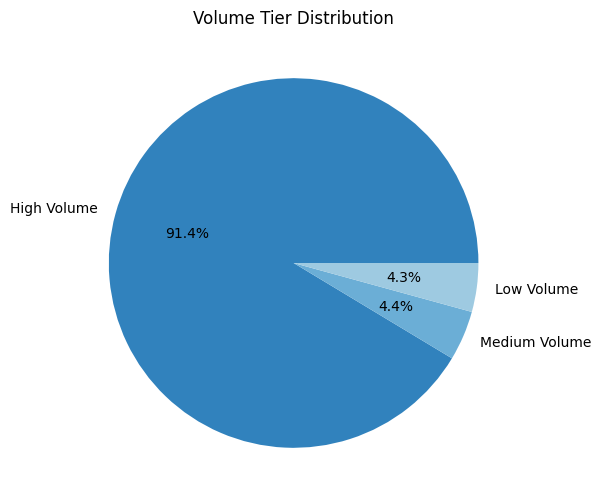

In [31]:
# Pie Chart: Volume Tier Distribution
plt.figure(figsize=(8, 6))
customer_data['Volume_Tier'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20c.colors)
plt.title('Volume Tier Distribution')
plt.ylabel('')
plt.savefig('Volume_Tier_Distribution_Pie.png')
plt.show()

## **Final Output Summary**

In [32]:
print("Customer Data Analysis:")
customer_data.head()

Customer Data Analysis:


,FakeCustomerID,Pre_COVID_Volume,COVID_Volume,Volume_Growth_Rate,Customer_Category,Capped_Growth,Volume_Tier,Customer_Size,Discount
0,100771,442.0,1341.0,203.393665,High Growth,100.000000,High Volume,Small,4
1,102180,1365.0,3989.0,192.234432,High Growth,100.000000,High Volume,Small,4
2,102643,745.0,1104.0,48.187919,High Growth,48.187919,High Volume,Small,4
3,102750,344.0,209.0,-39.244186,Declining,-39.244186,Medium Volume,Other,0
4,103308,19560.0,79952.0,308.752556,High Growth,100.000000,High Volume,Medium,10


In [33]:
print("\nPeak Season Volumes:")
print(f"2019: {peak_2019_volume}, 2020: {peak_2020_volume}")


Peak Season Volumes:
2019: 17031369, 2020: 21356413


In [34]:
print("\nVolume Tier Impact:")
volume_tier_impact


Volume Tier Impact:


,Volume_Tier,Pre_COVID_Volume,COVID_Volume,Customer_Count
0,Low Volume,92953.0,681.0,45
1,Medium Volume,25945.0,13501.0,46
2,High Volume,13003918.0,58842491.0,964


In [35]:
print("\nCustomer Category Distribution:")
customer_category_distribution


Customer Category Distribution:


,proportion
Customer_Category,
High Growth,85.308057
Declining,11.848341
New Customer,1.895735
Moderately Growing,0.947867


In [36]:
print("\nCustomer Size and Discounts:")
grouped_discounts


Customer Size and Discounts:


,Customer_Size,Total_Volume,Average_Discount,Customer_Count
0,Enterprise,43397844.0,22.0,11
1,Large,5940352.0,17.0,19
2,Medium,7102304.0,10.0,187
3,Other,97240.0,0.0,197
4,Small,2318933.0,4.0,641


In [37]:
# Display the Impact Table
print("\nOverall Impact of COVID on Volumes and Revenue by Customer Group:")
overall_impact


Overall Impact of COVID on Volumes and Revenue by Customer Group:


,Customer_Category,Total_Pre_COVID_Volume,Total_COVID_Volume,Average_Growth_Rate,Customer_Count,Pre_COVID_Revenue,COVID_Revenue,Revenue_Change
0,Declining,325986.0,119249.0,-58.264975,125,391183.2,143098.8,-248084.4
1,High Growth,12732796.0,58509348.0,2133.453763,900,15279355.2,70211217.6,54931862.4
2,Moderately Growing,64034.0,67877.0,6.986287,10,76840.8,81452.4,4611.6
3,New Customer,0.0,160199.0,NaN,20,0.0,192238.8,192238.8


In [38]:
# Save Results for Power BI
customer_data.to_csv('Customer_Data_Analysis.csv', index=False)
volume_tier_impact.to_csv('Volume_Tier_Impact.csv', index=False)
grouped_discounts.to_csv('Customer_Size_Discounts.csv', index=False)